In [1]:
%load_ext autoreload
%autoreload 2
root_dir = r"c:/Users/aagab/codes/Human_pose/new_statistical_coach/"

In [2]:
import sys
import os

# Get the absolute path to the project root
project_root = os.path.dirname(r"c:/Users/aagab/codes/Human_pose/new_statistical_coach/")
sys.path.insert(0, project_root)
sys.path.insert(0, os.path.join(project_root, 'src'))
sys.path.insert(0, os.path.join(project_root, 'utils'))
# project_root = os.path.dirname(r"c:/Users/aagab/codes/Human_pose/new_statistical_coach/")
# print(sys.path)  # Verify the paths are added

In [3]:
from process_yoga_video import process_yoga_video

> Currently, we are getting HOLD phase features after we are sure of holding the pose for 0.5 seconds

SHAPE OF VELOCITY MAGNITUDE: torch.Size([557, 33])
SHAPE OF SMOOTHED VELOCITY: torch.Size([557])
Movement detected at frame 1
Hold phase detected at frame 172


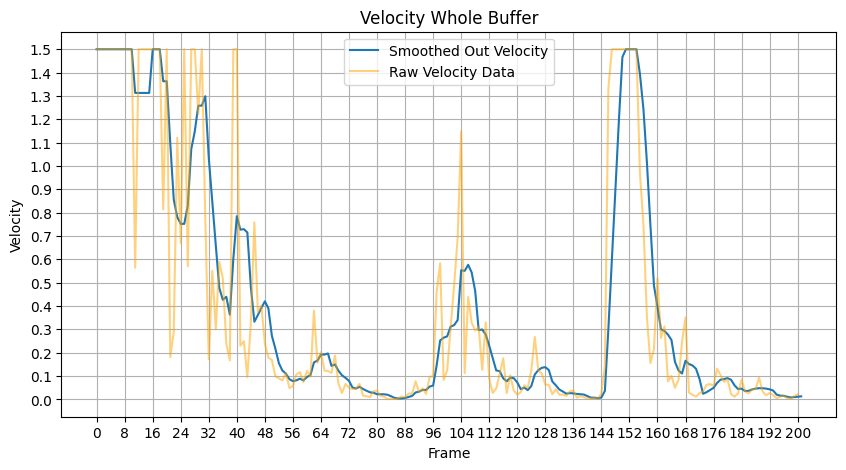

{0: (<PoseState.WAITING: 'waiting'>, 1), 1: (<PoseState.MOVEMENT: 'movement'>, 201), 202: (<PoseState.HOLD: 'hold'>, 0)}
Segment saved: clipped_videos_chair.mp4\movement_1_262.mp4


In [10]:
video_path = os.path.join(root_dir, "clips_for_dev/chair.mp4")
s = process_yoga_video(video_path, give_segmented_clip=True)

{0: {'right_shoulder_3d': tensor(149.9273, dtype=torch.float64), 'left_shoulder_3d': tensor(154.2083, dtype=torch.float64), 'right_elbow_3d': tensor(143.2112, dtype=torch.float64), 'left_elbow_3d': tensor(126.7491, dtype=torch.float64), 'right_hip_3d': tensor(107.1133, dtype=torch.float64), 'left_hip_3d': tensor(104.8682, dtype=torch.float64), 'right_knee_3d': tensor(117.8280, dtype=torch.float64), 'left_knee_3d': tensor(110.1833, dtype=torch.float64), 'right_ankle_3d': tensor(107.9046, dtype=torch.float64), 'left_ankle_3d': tensor(120.8961, dtype=torch.float64)}, 1: {'right_shoulder_3d': tensor(148.9243, dtype=torch.float64), 'left_shoulder_3d': tensor(153.8916, dtype=torch.float64), 'right_elbow_3d': tensor(143.1845, dtype=torch.float64), 'left_elbow_3d': tensor(126.8917, dtype=torch.float64), 'right_hip_3d': tensor(106.8649, dtype=torch.float64), 'left_hip_3d': tensor(104.8690, dtype=torch.float64), 'right_knee_3d': tensor(117.5536, dtype=torch.float64), 'left_knee_3d': tensor(110.4

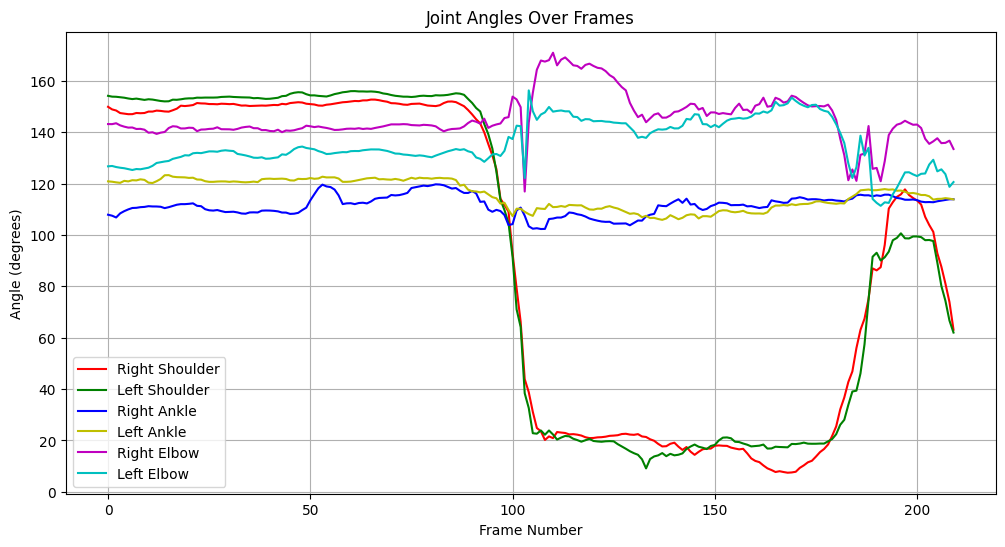

In [9]:
joint_angle_values = s[1]
print(joint_angle_values)

import matplotlib.pyplot as plt

def plot_joint_angles(joint_angle_values):
    frames = list(joint_angle_values.keys())

    right_shoulder_angles = [joint_angle_values[frame]['right_shoulder_3d'].item() for frame in frames]
    left_shoulder_angles = [joint_angle_values[frame]['left_shoulder_3d'].item() for frame in frames]
    right_ankle_angles = [joint_angle_values[frame]['right_ankle_3d'].item() for frame in frames]
    left_ankle_angles = [joint_angle_values[frame]['left_ankle_3d'].item() for frame in frames]
    right_elbow_angles = [joint_angle_values[frame]['right_elbow_3d'].item() for frame in frames]
    left_elbow_angles = [joint_angle_values[frame]['left_elbow_3d'].item() for frame in frames]

    plt.figure(figsize=(12, 6))
    plt.plot(frames, right_shoulder_angles, label='Right Shoulder', color='r')
    plt.plot(frames, left_shoulder_angles, label='Left Shoulder', color='g')
    plt.plot(frames, right_ankle_angles, label='Right Ankle', color='b')
    plt.plot(frames, left_ankle_angles, label='Left Ankle', color='y')
    plt.plot(frames, right_elbow_angles, label='Right Elbow', color='m')
    plt.plot(frames, left_elbow_angles, label='Left Elbow', color='c')

    plt.xlabel('Frame Number')
    plt.ylabel('Angle (degrees)')
    plt.title('Joint Angles Over Frames')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_joint_angles(joint_angle_values)

In [227]:
joint_configs = {
        # Upper body
        'right_shoulder': {
            'joints': (13, 11, 23),  # right_elbow, right_shoulder, right_hip
            'joint_names': ('right_elbow', 'right_shoulder', 'right_hip'),
            'planes': ['sagittal', 'transverse', 'frontal']
        },
        'left_shoulder': {
            'joints': (14, 12, 24),  # left_elbow, left_shoulder, left_hip
            'joint_names': ('left_elbow', 'left_shoulder', 'left_hip'),
            'planes': ['sagittal', 'transverse', 'frontal']
        },
        'right_elbow': {
            'joints': (11, 13, 15),  # right_shoulder, right_elbow, right_wrist
            'joint_names': ('right_shoulder', 'right_elbow', 'right_wrist'),
            'planes': ['sagittal', 'transverse', 'frontal']
        },
        'left_elbow': {
            'joints': (12, 14, 16),  # left_shoulder, left_elbow, left_wrist
            'joint_names': ('left_shoulder', 'left_elbow', 'left_wrist'),
            'planes': ['sagittal', 'transverse', 'frontal']
        },
        
        # Lower body
        'right_hip': {
            'joints': (11, 23, 25),  # right_shoulder, right_hip, right_knee
            'joint_names': ('right_shoulder', 'right_hip', 'right_knee'),
            'planes': ['sagittal', 'transverse', 'frontal']
        },
        'left_hip': {
            'joints': (12, 24, 26),  # left_shoulder, left_hip, left_knee
            'joint_names': ('left_shoulder', 'left_hip', 'left_knee'),
            'planes': ['sagittal', 'transverse', 'frontal']
        },
        'right_knee': {
            'joints': (23, 25, 27),  # right_hip, right_knee, right_ankle
            'joint_names': ('right_hip', 'right_knee', 'right_ankle'),
            'planes': ['sagittal', 'transverse', 'frontal']  # Now including transverse
        },
        'left_knee': {
            'joints': (24, 26, 28),  # left_hip, left_knee, left_ankle
            'joint_names': ('left_hip', 'left_knee', 'left_ankle'),
            'planes': ['sagittal', 'transverse', 'frontal']  # Now including transverse
        },
        'right_ankle': {
            'joints': (25, 27, 31),  # right_knee, right_ankle, right_foot_index
            'joint_names': ('right_knee', 'right_ankle', 'right_foot_index'),
            'planes': ['sagittal', 'transverse', 'frontal']
        },
        'left_ankle': {
            'joints': (26, 28, 32),  # left_knee, left_ankle, left_foot_index
            'joint_names': ('left_knee', 'left_ankle', 'left_foot_index'),
            'planes': ['sagittal', 'transverse', 'frontal']
        }
}

In [228]:
# removes _3d prefix
jav = {}
for k, v in joint_angle_values.items():
    jav[k] = {ik[:-3]: iv for ik, iv in v.items()}

In [229]:
jav[0]
detailed_jav = {}
for k, v in jav[0].items():
    reference_joints = joint_configs[k]['joint_names']
    detailed_jav[k] = (reference_joints, v)
    # print(reference_joints)
    
detailed_jav

{'right_shoulder': (('right_elbow', 'right_shoulder', 'right_hip'),
  tensor(167.7047, dtype=torch.float64)),
 'left_shoulder': (('left_elbow', 'left_shoulder', 'left_hip'),
  tensor(154.0675, dtype=torch.float64)),
 'right_elbow': (('right_shoulder', 'right_elbow', 'right_wrist'),
  tensor(152.7552, dtype=torch.float64)),
 'left_elbow': (('left_shoulder', 'left_elbow', 'left_wrist'),
  tensor(139.9435, dtype=torch.float64)),
 'right_hip': (('right_shoulder', 'right_hip', 'right_knee'),
  tensor(169.8128, dtype=torch.float64)),
 'left_hip': (('left_shoulder', 'left_hip', 'left_knee'),
  tensor(169.0292, dtype=torch.float64)),
 'right_knee': (('right_hip', 'right_knee', 'right_ankle'),
  tensor(166.7645, dtype=torch.float64)),
 'left_knee': (('left_hip', 'left_knee', 'left_ankle'),
  tensor(171.2588, dtype=torch.float64)),
 'right_ankle': (('right_knee', 'right_ankle', 'right_foot_index'),
  tensor(120.5761, dtype=torch.float64)),
 'left_ankle': (('left_knee', 'left_ankle', 'left_foot_i

In [324]:
import torch
from typing import Dict, Tuple, List, Any, Union

ACTION_JOINT_MAPPING = {
    'T_pose': ['right_shoulder', 'left_shoulder', 'right_elbow', 'left_elbow'],
    'warrior_pose': ['right_knee', 'left_knee', 'right_hip', 'left_hip', 'right_ankle', 'left_ankle'],
    'tree_pose': ['right_hip', 'left_hip', 'right_knee', 'left_knee', 'right_ankle', 'left_ankle'],
    'mountain': ['right_ankle', 'left_ankle', 'right_knee', 'left_knee', 'right_hip', 'left_hip', 'right_shoulder', 'left_shoulder']
}

TARGET_ANGLES = {
    'T_pose': {
        'right_shoulder': 180.0,
        'left_shoulder': 180.0,
        'right_elbow': 180.0,
        'left_elbow': 180.0
    },
    'warrior_pose': {
        'right_knee': 90.0,  # Front knee bent at 90 degrees
        'left_knee': 170.0, # Back leg relatively straight, slight bend to avoid hyperextension
        'right_hip': 170.0, # Open hip, but not excessively so
        'left_hip': 170.0,
        'right_ankle': 90.0,
        'left_ankle': 90.0
    },
    'mountain': {
        'right_ankle': 130, 
        'left_ankle': 130,
        'right_knee': 175.0, # Not locked, slight bend to prevent hyperextension
        'left_knee': 175.0,
        'right_hip': 180.0,
        'left_hip': 180.0,
        'right_shoulder': 180.0,
        'left_shoulder': 180.0
    },
    'downward_dog': {
    'right_ankle': 90, # Dorsiflexed
    'left_ankle': 90, # Dorsiflexed
    'right_knee': 175, # Slight bend
    'left_knee': 175, # Slight bend
    'right_hip': 90,
    'left_hip': 90,
    'right_shoulder': 180,
    'left_shoulder': 180
    }
}

def format_angle_data(angle_data: Dict[str, Union[Tuple, torch.Tensor]]) -> Dict[str, float]:
    """
    Convert the raw angle data into a clean dictionary of float values
    """
    formatted_data = {}
    for joint, data in angle_data.items():
        # Check if the data is a tuple (joints, angle) or just an angle
        if isinstance(data, tuple):
            angle = data[1]
        else:
            angle = data
        
        # Convert tensor to float
        if isinstance(angle, torch.Tensor):
            formatted_data[joint] = float(angle)
        else:
            formatted_data[joint] = float(angle)
    
    return formatted_data

def generate_pose_feedback_prompt(
    user_angles: Dict[str, Any],
    target_angles: Dict[str, Any],
    action_type: str,
    joint_configs: Dict[str, Dict[str, Any]]
) -> str:
    """
    Generate a structured prompt for pose feedback
    
    Parameters:
    - user_angles: Dictionary of current user joint angles
    - target_angles: Dictionary of target joint angles
    - action_type: Type of pose/action being performed
    - joint_configs: Configuration dictionary containing joint relationships
    
    Returns:
    - Formatted prompt string
    """
    # Format the angle data
    # print(user_angles)
    user_angles_clean = format_angle_data(user_angles)
    target_angles_clean = format_angle_data(target_angles)
    
    # print("User Angles Clean:", user_angles_clean)
    # print("Target Angles Clean:", target_angles_clean)
    # Get relevant joints for this action
    relevant_joints = ACTION_JOINT_MAPPING.get(action_type, [])
    # print("Relevant Joints:", relevant_joints) 
    # Build the prompt
    # action_type = 'downward dog'
    prompt_parts = [
        f"Action: {action_type} Pose\n",
        "Current Joint Analysis:\n"
    ]
    
    # Add joint-specific information
    for joint in relevant_joints:
        if joint in user_angles_clean and joint in target_angles_clean:
            current_angle = user_angles_clean[joint]
            target_angle = target_angles_clean[joint]
            # print(current_angle)
            
            # Get involved body parts from joint_configs
            involved_parts = joint_configs[joint]['joint_names']
            
            prompt_parts.append(
                f"- {joint.replace('_', ' ').title()}:\n"
                f"  Current: {current_angle:.1f}°\n"
                f"  Target: {target_angle:.1f}°\n"
                f"  Involved parts: {', '.join(involved_parts)}\n"
            )
    
    # Add instruction for the language model
    # prompt_parts.extend([
    #     "\nContext:",
    #     f"- This is a {action_type.replace('_', ' ')} position",
    #     "- Angles represent the degree between connected body parts",
    #     "- 180° represents a straight line\n",
    #     "Task: Based on these angles, provide clear, simple feedback in 5-10 words",
    #     "focusing on the most important corrections needed for proper form.",
    #     "Prioritize larger deviations and maintain bilateral symmetry where appropriate.",
    #     "Don't use numbers simply use words used by a typical yoga coach or a fitness coach, but use simple words.",
    #     "Focus only on the most significant flaw, first go though all the deviations and find out one that is affecting the pose most.",
    #     "Give direct feedback about the most significant flaw about what should be done like a direct coach but limit to 5 - 10 words output only what coach would say.",
    # ])
   # Edit in the prompt
    prompt_parts.extend([
        "\nContext:",
        f"- This is a {action_type.replace('_', ' ')} position.",
        "- Focus on angles representing proper body alignment.",
        "Task: Respond ONLY with the coach's feedback in 5-10 words. Avoid any extra explanations or numbers.",
        "Keep it short, direct, and actionable, like a yoga instructor would.",
        "Only focus on most significant flaw and give output like the user is listening while doing the pose."
    ])
 
    return "\n".join(prompt_parts)

In [325]:

test_data= {
    'right_ankle': 170,  # 90 target
    'left_ankle': 160,    # 90
    'right_knee': 175, 
    'left_knee': 175, 
    'right_hip': 90,
    'left_hip': 90,
    'right_shoulder': 180,
    'left_shoulder': 180
}

In [326]:
prompt = generate_pose_feedback_prompt(detailed_jav, TARGET_ANGLES['mountain'], 'mountain', joint_configs)
print(prompt)

Action: mountain Pose

Current Joint Analysis:

- Right Ankle:
  Current: 120.6°
  Target: 130.0°
  Involved parts: right_knee, right_ankle, right_foot_index

- Left Ankle:
  Current: 126.9°
  Target: 130.0°
  Involved parts: left_knee, left_ankle, left_foot_index

- Right Knee:
  Current: 166.8°
  Target: 175.0°
  Involved parts: right_hip, right_knee, right_ankle

- Left Knee:
  Current: 171.3°
  Target: 175.0°
  Involved parts: left_hip, left_knee, left_ankle

- Right Hip:
  Current: 169.8°
  Target: 180.0°
  Involved parts: right_shoulder, right_hip, right_knee

- Left Hip:
  Current: 169.0°
  Target: 180.0°
  Involved parts: left_shoulder, left_hip, left_knee

- Right Shoulder:
  Current: 167.7°
  Target: 180.0°
  Involved parts: right_elbow, right_shoulder, right_hip

- Left Shoulder:
  Current: 154.1°
  Target: 180.0°
  Involved parts: left_elbow, left_shoulder, left_hip


Context:
- This is a mountain position.
- Focus on angles representing proper body alignment.
Task: Respond

In [327]:
from groq import Groq
from dotenv import load_dotenv
import os

load_dotenv()

def get_llama_feedback(
    user_content, 
    system_content="You are a helpful fitness coach providing precise, constructive feedback.",
    model="llama-3.1-8b-instant", 
    temperature=0, 
    max_completion_tokens=1024, 
    top_p=1
):
    """
    Generate feedback using Groq's Llama API.
    
    Args:
        user_content (str): The main content/prompt to send to the model
        system_content (str, optional): System message to set model context. Defaults to fitness coach prompt.
        model (str, optional): Model to use. Defaults to "llama-3.1-8b-instant".
        temperature (float, optional): Sampling temperature. Defaults to 1.
        max_completion_tokens (int, optional): Maximum tokens in response. Defaults to 1024.
        top_p (float, optional): Nucleus sampling parameter. Defaults to 1.
    
    Returns:
        str: Generated model feedback
    """
    client = Groq(api_key=os.getenv("GROQ_API_KEY"))  

    completion = client.chat.completions.create(
        model=model,
        messages=[
            {
                "role": "system", 
                "content": system_content
            },
            {
                "role": "user", 
                "content": user_content
            }
        ],
        temperature=temperature,
        max_completion_tokens=max_completion_tokens,
        top_p=top_p,
        stream=True,
        stop=None,
    )

    model_feedback = ""
    for chunk in completion:
        content = chunk.choices[0].delta.content or ""
        print(content, end="")
        model_feedback += content
    
    return model_feedback

# # Extract the model's feedback
# model_feedback = response.choices[0].message.content.strip()
# print(model_feedback)


In [334]:
# model_feedback = get_llama_feedback(prompt, temperature=0, model="llama-3.2-3b-preview")
# model_feedback = get_llama_feedback(prompt, temperature=0, model="gemma2-9b-it")
# prompt = "Give me feedback about how to do Mountain pose yoga in 10 words."
model_feedback = get_llama_feedback(prompt, temperature=0)

Left shoulder, engage and lift it up higher.

In [335]:
from text_to_speech import text_to_speech

In [333]:
SAMPLE_RATE = 22050
audio = text_to_speech(model_feedback)
from IPython.display import Audio, display
display(Audio(audio, rate=SAMPLE_RATE))


Generating speech for: 'Left shoulder, engage and lift it up higher.'
Debug - Processed phonemes: 'lˈɛft ʃˈoʊldɚ, ɛŋɡˈeɪdʒ aend lˈɪft ɪɾ ˌʌp hˈaɪɚ.'

Audio saved to output.wav
Generated phonemes: lˈɛft ʃˈoʊldɚ, ɛŋɡˈeɪdʒ aend lˈɪft ɪɾ ˌʌp hˈaɪɚ.


In [336]:
import requests

def get_language_model_feedback(
    user_content, 
    system_content="You are a helpful fitness coach providing precise, constructive feedback.",
    model="local-model", 
    temperature=0, 
    max_tokens=1024, 
    top_p=1,
    base_url="http://localhost:1234/v1"
):
    """
    Generate feedback using LM Studio's local server.
    
    Args:
        user_content (str): The main content/prompt to send to the model
        system_content (str, optional): System message to set model context. 
        model (str, optional): Model identifier. Defaults to "local-model".
        temperature (float, optional): Sampling temperature. Defaults to 1.
        max_tokens (int, optional): Maximum tokens in response. Defaults to 1024.
        top_p (float, optional): Nucleus sampling parameter. Defaults to 1.
        base_url (str, optional): Base URL for LM Studio server. Defaults to local endpoint.
    
    Returns:
        str: Generated model feedback
    """
    try:
        # Prepare the payload for the API request
        payload = {
            "messages": [
                {"role": "system", "content": system_content},
                {"role": "user", "content": user_content}
            ],
            "temperature": temperature,
            "max_tokens": max_tokens,
            "top_p": top_p,
            "model": model
        }

        # Send POST request to LM Studio server
        response = requests.post(
            f"{base_url}/chat/completions", 
            json=payload
        )

        # Check if the request was successful
        response.raise_for_status()

        # Extract and return the model's response
        model_response = response.json()
        model_feedback = model_response['choices'][0]['message']['content'].strip()

        # Optional: Print the feedback as it's generated
        print(model_feedback)
        
        return model_feedback

    except requests.RequestException as e:
        print(f"Error communicating with LM Studio server: {e}")
        return ""

# Example usage remains the same

In [346]:

model_feedback = get_language_model_feedback(prompt)

Focus on straightening your left shoulder and hip to match the right side.


In [347]:
SAMPLE_RATE = 22050
audio = text_to_speech(model_feedback)
from IPython.display import Audio, display
display(Audio(audio, rate=SAMPLE_RATE))


Generating speech for: 'Focus on straightening your left shoulder and hip to match the right side.'
Debug - Processed phonemes: 'fˈoʊkəs ˌɔn stɹˈeɪtənɪŋ jʊɹ lˈɛft ʃˈoʊldɚ aend hˈɪp tə mˈaetʃ ðə ɹˈaɪt sˈaɪd.'

Audio saved to output.wav
Generated phonemes: fˈoʊkəs ˌɔn stɹˈeɪtənɪŋ jʊɹ lˈɛft ʃˈoʊldɚ aend hˈɪp tə mˈaetʃ ðə ɹˈaɪt sˈaɪd.


In [339]:
def generate_pose_feedback_prompt(
    user_angles: Dict[str, Any],
    target_angles: Dict[str, Any],
    action_type: str,
    joint_configs: Dict[str, Dict[str, Any]]
) -> str:
    """
    Generate a structured prompt for pose feedback
    
    Parameters:
    - user_angles: Dictionary of current user joint angles
    - target_angles: Dictionary of target joint angles
    - action_type: Type of pose/action being performed
    - joint_configs: Configuration dictionary containing joint relationships
    
    Returns:
    - Formatted prompt string
    """
    # Format the angle data
    user_angles_clean = format_angle_data(user_angles)
    target_angles_clean = format_angle_data(target_angles)
    
    # Get relevant joints for this action
    relevant_joints = ACTION_JOINT_MAPPING.get(action_type, [])
    
    # Build the prompt
    prompt_parts = [
        f"Action: {action_type} Pose\n",
        "Current Joint Analysis:\n"
    ]
    
    # Add joint-specific information
    for joint in relevant_joints:
        if joint in user_angles_clean and joint in target_angles_clean:
            current_angle = user_angles_clean[joint]
            target_angle = target_angles_clean[joint]
            
            # Get involved body parts from joint_configs
            involved_parts = joint_configs[joint]['joint_names']
            
            prompt_parts.append(
                f"- {joint.replace('_', ' ').title()}:\n"
                f"  Current: {current_angle:.1f}°\n"
                f"  Target: {target_angle:.1f}°\n"
                f"  Involved parts: {', '.join(involved_parts)}\n"
            )
    
    # Add detailed instructions for feedback generation
    prompt_parts.extend([
        "\nContext:",
        f"- This is a {action_type.replace('_', ' ')} pose, requiring specific alignment.",
        "- Angles indicate the degree of alignment between connected body parts.",
        "- 180° represents a straight alignment; deviations suggest misalignment.",
        "- The focus is on identifying the single most significant misalignment.",
        "\nTask:",
        "- Evaluate the angles provided and identify the most significant issue affecting the pose.",
        "- Use clear, simple feedback as a yoga or fitness coach would.",
        "- Avoid numerical feedback; instead, describe adjustments in plain language.",
        "- Prioritize fixing the most impactful flaw first and maintaining bilateral symmetry.",
        "- Suggest corrections concisely in 5-10 words."
    ])
    
    return "\n".join(prompt_parts)


In [340]:

prompt = generate_pose_feedback_prompt(detailed_jav, TARGET_ANGLES['mountain'], 'mountain', joint_configs)
print(prompt)

Action: mountain Pose

Current Joint Analysis:

- Right Ankle:
  Current: 120.6°
  Target: 130.0°
  Involved parts: right_knee, right_ankle, right_foot_index

- Left Ankle:
  Current: 126.9°
  Target: 130.0°
  Involved parts: left_knee, left_ankle, left_foot_index

- Right Knee:
  Current: 166.8°
  Target: 175.0°
  Involved parts: right_hip, right_knee, right_ankle

- Left Knee:
  Current: 171.3°
  Target: 175.0°
  Involved parts: left_hip, left_knee, left_ankle

- Right Hip:
  Current: 169.8°
  Target: 180.0°
  Involved parts: right_shoulder, right_hip, right_knee

- Left Hip:
  Current: 169.0°
  Target: 180.0°
  Involved parts: left_shoulder, left_hip, left_knee

- Right Shoulder:
  Current: 167.7°
  Target: 180.0°
  Involved parts: right_elbow, right_shoulder, right_hip

- Left Shoulder:
  Current: 154.1°
  Target: 180.0°
  Involved parts: left_elbow, left_shoulder, left_hip


Context:
- This is a mountain pose, requiring specific alignment.
- Angles indicate the degree of alignment

In [348]:
model_feedback = get_language_model_feedback(prompt)

Focus on straightening your left shoulder and hip to match the right side.


In [349]:
SAMPLE_RATE = 22050
audio = text_to_speech(model_feedback)
from IPython.display import Audio, display
display(Audio(audio, rate=SAMPLE_RATE))


Generating speech for: 'Focus on straightening your left shoulder and hip to match the right side.'
Debug - Processed phonemes: 'fˈoʊkəs ˌɔn stɹˈeɪtənɪŋ jʊɹ lˈɛft ʃˈoʊldɚ aend hˈɪp tə mˈaetʃ ðə ɹˈaɪt sˈaɪd.'

Audio saved to output.wav
Generated phonemes: fˈoʊkəs ˌɔn stɹˈeɪtənɪŋ jʊɹ lˈɛft ʃˈoʊldɚ aend hˈɪp tə mˈaetʃ ðə ɹˈaɪt sˈaɪd.


: 